<p align="center">Moratello Matteo 1205720</p>

<h1>Homework 1</h1> 
<h2>Valutazione</h2>

Indice:
- Confronto valori di MAP, Rprec e Precision at 10
- MAP
    - Test Statistico ANOVA 1-way
    - Tukey's HSD test
- Rprec
    - Test Statistico ANOVA 1-way
    - Tukey's HSD test
- Precision at 10
    - Test Statistico ANOVA 1-way
    - Tukey's HSD test

<h3>RUN 1</h3>
<ul>
  <li>Stoplist, Porter Stemmer, BM25</li>
</ul>

In [1]:
import numpy as np
dt = np.dtype([('name', np.unicode_, 16), ('query', np.float64, (1,)),('value', np.float64, (1,))])
eval_run1 = np.genfromtxt("bm25_stemmer_stoplist.csv", delimiter=';',dtype=dt)
map_1 = float(eval_run1[1355][2])
print("Mean Average Precision: ",map_1)
rprec_1 = float(eval_run1[1357][2])
print("RPrecision: ",rprec_1)
prec_at_10_1 = float(eval_run1[1372][2])
print("Precision at 10: ",prec_at_10_1)

Mean Average Precision:  0.2125
RPrecision:  0.2705
Precision at 10:  0.482


<h3>RUN 2</h3>
<ul>
  <li>Stoplist, Porter Stemmer, TF*IDF</li>
</ul>

In [2]:
dt = np.dtype([('name', np.unicode_, 16), ('query', np.float64, (1,)),('value', np.float64, (1,))])
eval_run2 = np.genfromtxt("tf_idf_stemmer_stoplist.csv", delimiter=';',dtype=dt)
map_2 = float(eval_run2[1355][2])
print("Mean Average Precision: ",map_2)
rprec_2 = float(eval_run2[1357][2])
print("RPrecision: ",rprec_2)
prec_at_10_2 = float(eval_run2[1372][2])
print("Precision at 10: ",prec_at_10_2)

Mean Average Precision:  0.2123
RPrecision:  0.2725
Precision at 10:  0.478


<h3>RUN 3</h3>
<ul>
  <li>No Stoplist, Porter Stemmer, BM25</li>
</ul>

In [3]:
dt = np.dtype([('name', np.unicode_, 16), ('query', np.float64, (1,)),('value', np.float64, (1,))])
eval_run3 = np.genfromtxt("bm25_stemmer.csv", delimiter=';',dtype=dt)
map_3 = float(eval_run3[1355][2])
print("Mean Average Precision: ",map_3)
rprec_3 = float(eval_run3[1357][2])
print("RPrecision: ",rprec_3)
prec_at_10_3 = float(eval_run3[1372][2])
print("Precision at 10: ",prec_at_10_3)

Mean Average Precision:  0.1245
RPrecision:  0.1701
Precision at 10:  0.302


<h3>RUN 4</h3>
<ul>
  <li>No Stoplist, No Porter Stemmer, TF*IDF</li>
</ul>

In [4]:
dt = np.dtype([('name', np.unicode_, 16), ('query', np.float64, (1,)),('value', np.float64, (1,))])
eval_run4 = np.genfromtxt("tf_idf.csv", delimiter=';',dtype=dt)
map_4 = float(eval_run4[1355][2])
print("Mean Average Precision: ",map_4)
rprec_4 = float(eval_run4[1357][2])
print("RPrecision: ",rprec_4)
prec_at_10_4 = float(eval_run4[1372][2])
print("Precision at 10: ",prec_at_10_4)

Mean Average Precision:  0.1876
RPrecision:  0.2485
Precision at 10:  0.426


<h2>Confronto valori di MAP, Rprec e Precision at 10</h2>

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# creo tabella per confrontare i valori di MAP, Rprec e Precision at 10
MAP = np.array([map_1,map_2,map_3,map_4])
Rprec = np.array([rprec_1,rprec_2,rprec_3,rprec_4])
Precision = np.array([prec_at_10_1,prec_at_10_2,prec_at_10_3,prec_at_10_4])
print()
models = np.array(['BM25 SL+PS','TF*IDF SL+PS','BM25 PS','TF*IDF'])
d = {'MAP': MAP, 'Rprec': Rprec, 'Precision at 10': Precision}
results = pd.DataFrame(data=d)
results.rename({0: 'BM25 Stoplist,PorterStemmer', 1: 'TF*IDF Stoplist,PorterStemmer',2: 'BM25 No Stoplist,PorterStemmer',3: 'TF*IDF No Stoplist,No PorterStemmer'})

,MAP,Rprec,Precision at 10
"BM25 Stoplist,PorterStemmer",0.2125,0.2705,0.482
"TF*IDF Stoplist,PorterStemmer",0.2123,0.2725,0.478
"BM25 No Stoplist,PorterStemmer",0.1245,0.1701,0.302
"TF*IDF No Stoplist,No PorterStemmer",0.1876,0.2485,0.426


La tabella riporta i risultati delle diverse run attraverso le tre misure di valutazione MAP, Rprec e Precision at 10. Per un confronto migliore si riportano i dati nel grafico sottostante.

<h3>Plot</h3>

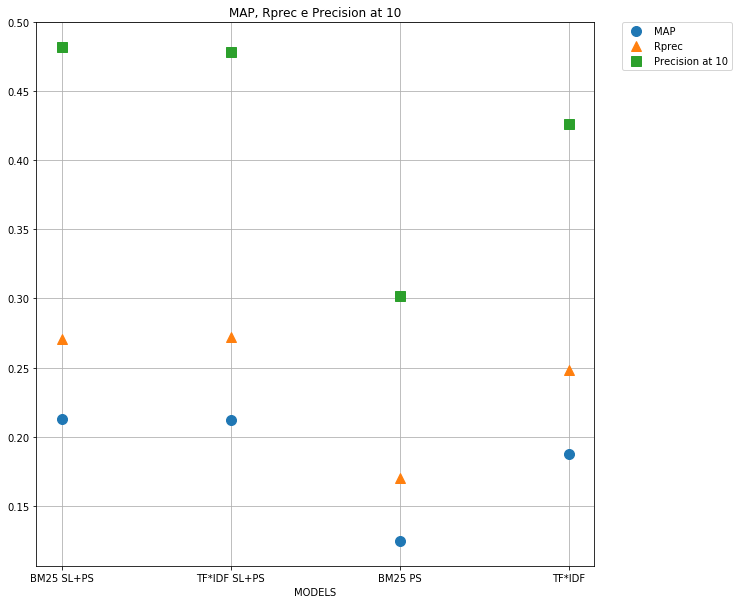

In [6]:
plt.figure(1, figsize=(10,10))
p1= plt.plot(models, MAP, 'o', markersize=10, label = "MAP")
p2 = plt.plot(models, Rprec , 'o', marker = "^", markersize=10, label = 'Rprec')
p3 = plt.plot(models, Precision , 'o', marker = "s", markersize=10, label = 'Precision at 10')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(True)
plt.title('MAP, Rprec e Precision at 10')
plt.xlabel('MODELS')
plt.show()

Dove:
- PS = Porter Stemmer
- SL = Stoplist

Come si può vedere dal grafico, le run con i risultati migliori sono le prime due, cioé quelle eseguite con i sistemi BM25 e TF*IDF con Porter Stemmer e Stoplist. Nella collezione considerata, il processo di riduzione di una parola alla sua forma radice (stemming) e l'esclusione dall'indice di parole molto frequenti (stoplist) risulta molto efficace indipendentemente dal modello considerato, essenzialmente i valori trovati sono equiparabili. I risultati peggiori sono invece ottenuti dalla run 3 eseguita con modello BM25 con PorterStemmer.

<h2>MAP</h2>

<h2> Test Statistico ANOVA 1-way</h2>

In [7]:
import scipy.stats as stats
import pylab as pl

#Reperimento valori di Average Precision per il test statistico ANOVA 1-way
map_values1 = np.zeros(51)
map_values2 = np.zeros(51)
map_values3 = np.zeros(51)
map_values4 = np.zeros(51)
j=0
for i in range(eval_run1.shape[0]):
    if(eval_run1[i][0]== "map"):
        #estrazione valori di MAP per i 50 topic
        map_values1[j]=float(eval_run1[i][2])
        map_values2[j]=float(eval_run2[i][2])
        map_values3[j]=float(eval_run3[i][2])
        map_values4[j]=float(eval_run4[i][2])
        j = j+1
#50 valori, uno per topic, di AP per ogni run
map_values1 = map_values1[:50]
map_values2 = map_values2[:50]
map_values3 = map_values3[:50]
map_values4 = map_values4[:50]

<h2>Plots</h2>
Nella prima parte si visualizzano i plot delle distribuzioni dei valori di AP (uno per ogni topic) per ciascuna delle quattro run ed il confronto tra queste tramite Boxplot.
<h3>BM25 with Porter Stemmer and Stopword</h3>

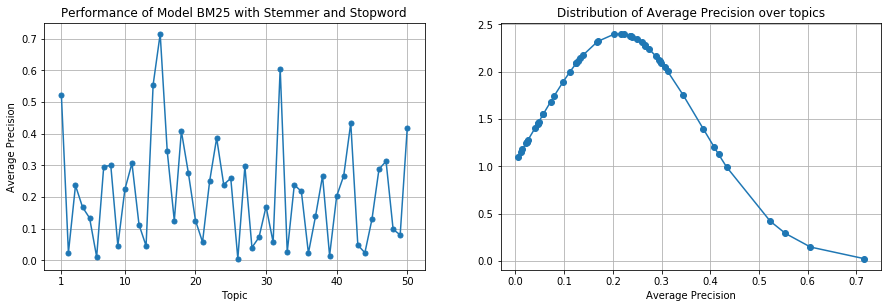

In [8]:
plt.figure(2,figsize=(15,10))
plt.subplot(221)
plt.plot(np.arange(1, 51, step=1),map_values1,marker='o', markersize=5)
plt.grid(True)
plt.xticks([1,10,20,30,40,50])
plt.xlabel('Topic')
plt.ylabel('Average Precision')
plt.title('Performance of Model BM25 with Stemmer and Stopword')

plt.subplot(222)
h=sorted(map_values1)
fit = stats.norm.pdf(h, np.mean(h), np.std(h))  
pl.plot(h,fit,'-o')
#pl.hist(h)     
plt.title('Distribution of Average Precision over topics')
plt.xlabel('Average Precision')
plt.grid(True)
#pl.show()
plt.show()

I plot mostrano i valori di AP per ogni topic, 50 in questo caso. Average Precision è un indicatore importante dell'efficienza generale del sistema, infatti é uguale al valore dell'area sotto la curva Precision-Recall (AUC). La maggior parte dei valori AP sono tra 0 e 0.3 come si può vedere dalla distribuzione a destra.

<h3>TF*IDF with Porter Stemmer and Stopword</h3>

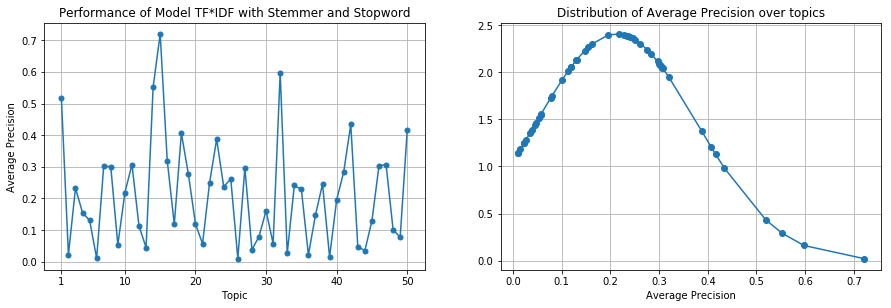

In [9]:
plt.figure(3,figsize=(15,10))
plt.subplot(221)
plt.plot(np.arange(1, 51, step=1),map_values2,marker='o', markersize=5)
plt.grid(True)
plt.xticks([1,10,20,30,40,50])
plt.xlabel('Topic')
plt.ylabel('Average Precision')
plt.title('Performance of Model TF*IDF with Stemmer and Stopword')

plt.subplot(222)
h=sorted(map_values2)
fit = stats.norm.pdf(h, np.mean(h), np.std(h))  
pl.plot(h,fit,'-o')
#pl.hist(h)      
plt.title('Distribution of Average Precision over topics')
plt.xlabel('Average Precision')
plt.grid(True)
#pl.show()
plt.show()

Anche in questa run i valori di AP sono principalmente nel range tra 0 e 0.3. Infatti il modello, come visto sopra, è molto simile al primo.

<h3>BM25 with Porter Stemmer and no Stopword</h3>

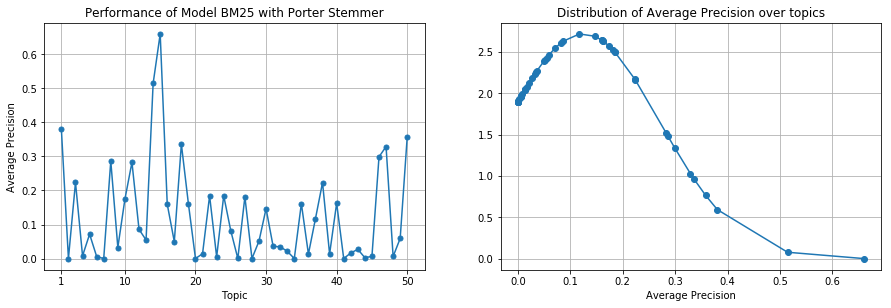

In [10]:
plt.figure(4,figsize=(15,10))
plt.subplot(221)
plt.plot(np.arange(1, 51, step=1),map_values3,marker='o', markersize=5)
plt.grid(True)
plt.xticks([1,10,20,30,40,50])
plt.xlabel('Topic')
plt.ylabel('Average Precision')
plt.title('Performance of Model BM25 with Porter Stemmer')

plt.subplot(222)
h=sorted(map_values3)
fit = stats.norm.pdf(h, np.mean(h), np.std(h))  
pl.plot(h,fit,'-o')
#pl.hist(h)      
plt.title('Distribution of Average Precision over topics')
plt.xlabel('Average Precision')
plt.grid(True)
#pl.show()
plt.show()

In questa run i valori di AP sono decisamente peggiori delle precedenti run. Infatti, ci sono molti valori AP<SUB>i</SUB> uguali a zero, ciò significa che il sistema non ha reperito alcun documento rilevante per il <i>topic</i><SUB>i</SUB>, dove i ∈ {1,..,50}.

<h3>TF*IDF with no Stemmer and no Stopword</h3>

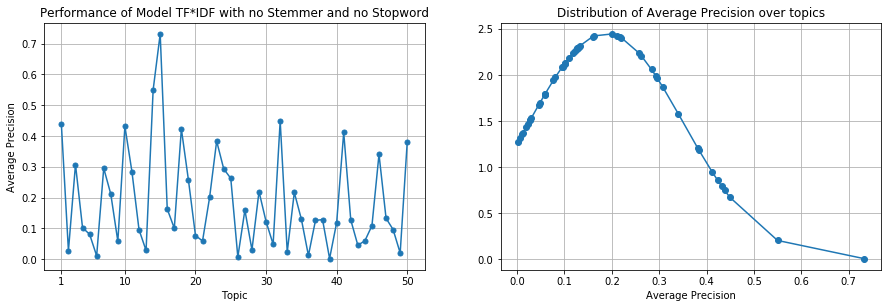

In [11]:
plt.figure(5,figsize=(15,10))
plt.subplot(221)
plt.plot(np.arange(1, 51, step=1),map_values4,marker='o', markersize=5)
plt.grid(True)
plt.xticks([1,10,20,30,40,50])
plt.xlabel('Topic')
plt.ylabel('Average Precision')
plt.title('Performance of Model TF*IDF with no Stemmer and no Stopword')

plt.subplot(222)
h=sorted(map_values4)
fit = stats.norm.pdf(h, np.mean(h), np.std(h))  
pl.plot(h,fit,'-o')
#pl.hist(h)     
plt.title('Distribution of Average Precision over topics')
plt.xlabel('Average Precision')
plt.grid(True)
#pl.show()
plt.show()

In questa run i valori di AP sono distribuiti tra i valori 0 e 0.4, il modello risulta essere migliore del precedente ma meno performante dei primi due.

<h2> Boxplot delle Run </h2>

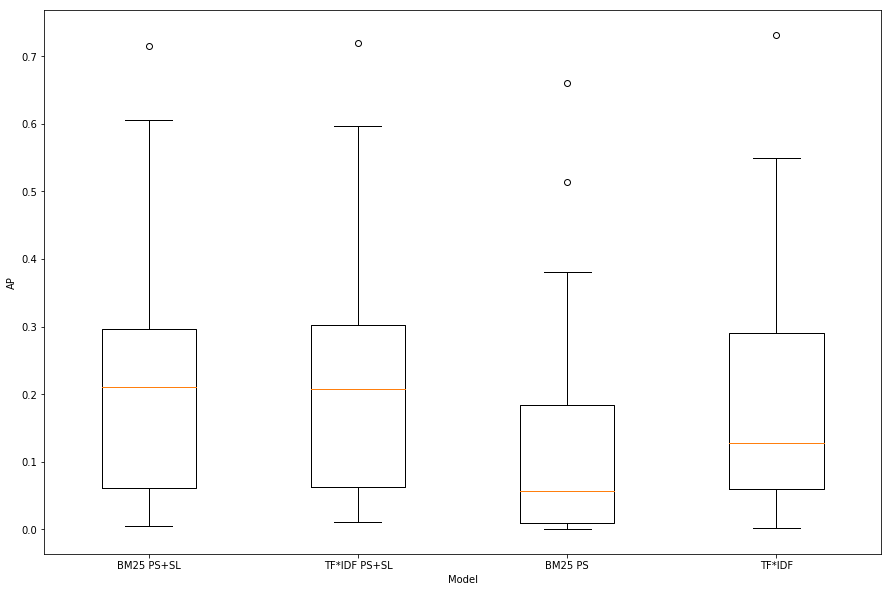

In [12]:
plt.figure(figsize=[15,10])
plt.boxplot([map_values1,map_values2,map_values3,map_values4], labels=['BM25 PS+SL','TF*IDF PS+SL','BM25 PS','TF*IDF'])
plt.ylabel("AP")
plt.xlabel("Model")
plt.show()

Dove:
- PS = Porter Stemmer
- SL = Stoplist

Il boxplot permette di rappresentare visivamente le caratteristiche fondamentali di una distribuzione statistica di dati campionari. Attraverso la mediana si può notare che le prime due run, come già visto, hanno un valore di AP maggiore ripetto alle altre ed una dispersione dei dati che oscilla tra il valore 0.05 e 0.3, ciò significa che i dati sono collocati intorno alla mediana. Per quanto riguarda la terza run oltre il ~99% dei dati non supera il valore 0.4 di AP, con due valori outlier che si discostano molto dalla media, uno a ~0.55 ed uno a ~0.7. Per evidenziare una differenza statistica tra le run considerate, e quindi la relazione tra modello e le fasi del processo di indicizzazione (stemmming,stoplist), si ricorre al test ANOVA 1-way.

<h3>Test</h3>
Il test ANOVA permette di verificare se due o più sistemi sono statisticamente uguali, partendo dall'ipotesi nulla, ovvero che le medie dei sistemi siano uguali:

<i>H<sub>0</sub> : μ<sub>1</sub> = μ<sub>2</sub> = μ<sub>3</sub> = μ<sub>4</sub></i>

Se l'ipotesi nulla viene rifiutata, significa che vi è una differenza significativa fra almeno due sistemi. Questa condizione si verifica nel test Anova 1-way quando il valore PR(>F) è inferiore a quello di $\alpha$, con $\alpha=0.05$ tipicamente.
Se il valore di F è “elevato”, la variabilità tra le medie campionarie è maggiore di quella attesa sulla base della variabilità all’interno dei singoli campioni, pertanto rifiutiamo l’ipotesi che tutti i sistemi siano uguali.

In [13]:
# funzione f_oneway() della libreria scipy.stats per eseguire il test ANOVA 1-way
stats,p = stats.f_oneway(map_values1,map_values2,map_values3,map_values4)

print("Test Anova 1-way:")
print("Valore di F:      ",stats)
print("Valore di PR(>F): ",p)

Test Anova 1-way:
Valore di F:       3.276239569877693
Valore di PR(>F):  0.02214360820320229


La null hypothesis viene rigettata in quanto PR(>F) < $\alpha$ (0.02214<0.05); si può affermare quindi che almeno un modello ha una distribuzione con una differenza statisticamente significativa rispetto ad un altro modello. Per verificare quali modelli sono statisticamente diversi dobbiamo confrontare ogni coppia di modelli, un metodo è il test hsd di Tukey.

<h2>Tukey's HSD (honestly significant difference) test</h2>

   Multiple Comparison of Means - Tukey HSD,FWER=0.05   
   group1       group2    meandiff  lower  upper  reject
--------------------------------------------------------
  BM25 PS       TF*IDF     0.0632  -0.0209 0.1472 False 
  BM25 PS    TF*IDF PS+SL  0.0878   0.0037 0.1718  True 
  BM25 PS     BM25 PS+SL   0.088    0.004  0.1721  True 
   TF*IDF    TF*IDF PS+SL  0.0246  -0.0594 0.1087 False 
   TF*IDF     BM25 PS+SL   0.0249  -0.0591 0.1089 False 
TF*IDF PS+SL  BM25 PS+SL   0.0003  -0.0838 0.0843 False 
--------------------------------------------------------


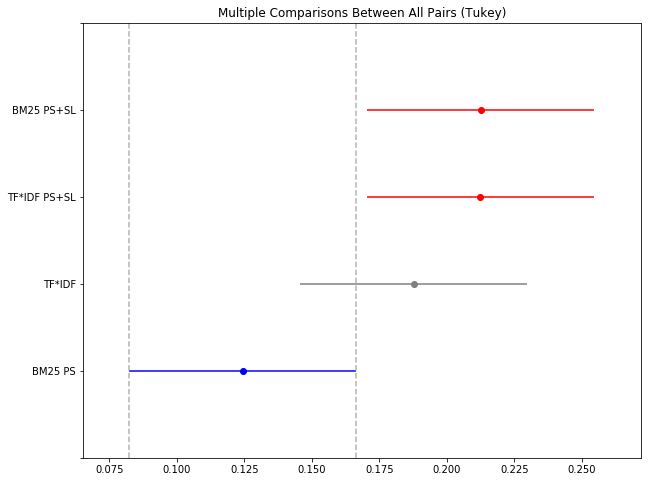

In [14]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
# ordino modelli per una migliore visualizzazione del test di Tukey
map_list = np.array([['BM25 PS+SL',MAP[0]],
                    ['TF*IDF PS+SL',MAP[1]],
                    ['BM25 PS',MAP[2]],
                    ['TF*IDF',MAP[3]]])
# array con nomi dei modelli
strs1 = ['BM25 PS+SL']*50
strs2 = ['TF*IDF PS+SL']*50
strs3 = ['BM25 PS']*50
strs4 = ['TF*IDF']*50

sorted_map_list = map_list[map_list[:,1].argsort()]
# valori di Average Precision
scores = np.concatenate((map_values1,map_values2,map_values3,map_values4))
models = np.array(strs1+strs2+strs3+strs4)
mc = MultiComparison(scores,models,group_order=sorted_map_list[:,0])
# test Tukey HSD
result = mc.tukeyhsd()
# plot del test di Tukey
result.plot_simultaneous(comparison_name="BM25 PS",figsize=(10,8))
# stampa tabella con i confronti tra i modelli considerati e la verifica che la null hypothesis sia stata rifiutata o no
print(result)

La tabella mostra i vari confronti tra coppie di modelli; le colonne <b>group1</b> e <b>group2</b> sono la coppia che viene confrontata, la colonna <b>meandiff</b> é la differenza delle medie dei due grupppi calcolata come group2-group1, le colonne <b>lower</b> e <b>upper</b> sono rispettivamente il limite inferiore e superiore dell'intervallo di confidenza e l'ultima colonna <b>reject</b> indica se l'ipotesi nulla viene rifiutata o meno. <br>
Dal test si può notare che nella seconda e terza riga della tabella, cioè nel confronto tra i modelli <b>"BM25 Stemmer - TF * IDF Stemmer+Stoplist"</b> e <b>"BM25 Stemmer - BM25 Stemmer+Stoplist"</b> l'ipotesi H<sub>0</sub> viene rifiutata, infatti il loro intervallo di confidenza non contiene l'origine, e ciò significa che i modelli sono statisticamente diversi. Questo risultato è evidenziato dal plot. <br>
Possiamo concludere quindi, per quanto riguarda questo test statistico sui valori di MAP, che i modelli appartenenti al <i>top group</i> sono quelli delle prime due run, cioè <b>BM 25 PorterStemmer+Stoplist</b> e <b> TF * IDF PorterStemmer+Stoplist</b>; essi sono significativamente diversi dal terzo modello <b> BM25 PorterStemmer</b>, mentre per quanto riguarda il quarto modello <b>TF * IDF no Stemmer no Stoplist</b>, esso non viola l'ipotesi nulla con nessuno degli altri modelli, ma l'intervallo di confidenza evidenza una certa differenza sia con i modelli appartenenti al <i>top group</i> sia con quello meno performante.

Si ripete ora il test statistico ANOVA 1-way e Tukey's Test anche per le misure R-Prec e Precision at 10

<h2>Rprec</h2>

In [15]:
#Reperimento valori di Rprec per il test statistico ANOVA 1-way
rPrec_values1 = np.zeros(51)
rPrec_values2 = np.zeros(51)
rPrec_values3 = np.zeros(51)
rPrec_values4 = np.zeros(51)
j=0
for i in range(eval_run1.shape[0]):
    if(eval_run1[i][0]== "Rprec"):
        #estrazione valori di Rprec per i 50 topic
        rPrec_values1[j]=float(eval_run1[i][2])
        rPrec_values2[j]=float(eval_run2[i][2])
        rPrec_values3[j]=float(eval_run3[i][2])
        rPrec_values4[j]=float(eval_run4[i][2])
        j = j+1
#50 valori, uno per topic, di Rprec per ogni run
rPrec_values1 = rPrec_values1[:50]
rPrec_values2 = rPrec_values2[:50]
rPrec_values3 = rPrec_values3[:50]
rPrec_values4 = rPrec_values4[:50]

<h3>BoxPlot delle run</h3>

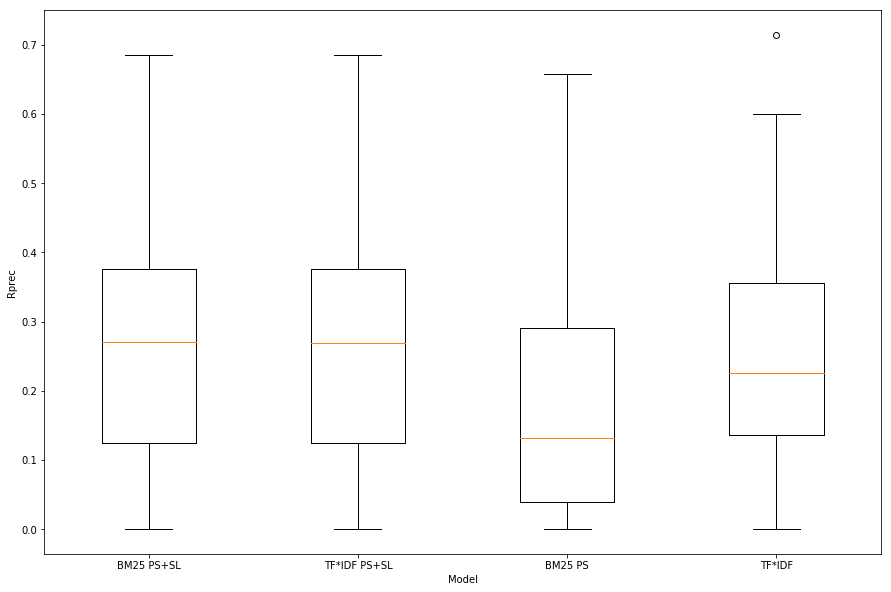

In [16]:
plt.figure(figsize=[15,10])
plt.boxplot([rPrec_values1,rPrec_values2,rPrec_values3,rPrec_values4], labels=['BM25 PS+SL','TF*IDF PS+SL','BM25 PS','TF*IDF'])
plt.ylabel("Rprec")
plt.xlabel("Model")
plt.show()

Dove:
- PS = Porter Stemmer
- SL = Stoplist

Il boxplot mostra che i valori di rPrec sono distribuiti in maniera più uniforme rispetto ad AP. I modelli migliori restano i primi due. Il modello meno performante resta il BM25 Stemmer, infatti, anche se assume valori molto alti di Rprec per alcuni topic ,in media il modello risulta poco performante.

<h3>ANOVA 1-way</h3>

In [17]:
import scipy.stats as stats
# funzione f_oneway() della libreria scipy.stats per eseguire il test ANOVA 1-way
stats,p = stats.f_oneway(rPrec_values1,rPrec_values2,rPrec_values3,rPrec_values4)

print("Test Anova 1-way:")
print("Valore di F:      ",stats)
print("Valore di PR(>F): ",p)

Test Anova 1-way:
Valore di F:       4.560140109254023
Valore di PR(>F):  0.00411143680902894


Anche in questo caso la null hypothesis viene rigettata in quanto PR(>F)<$\alpha$ (0.0041<0.05); si può affermare quindi che almeno un modello ha una distribuzione con una differenza statisticamente significativa rispetto ad un altro modello

<h3>Tukey's Test</h3>

  Multiple Comparison of Means - Tukey HSD,FWER=0.05  
  group1      group2    meandiff  lower  upper  reject
------------------------------------------------------
 BM25 PS      TF*IDF     0.0784  -0.0042 0.1609 False 
 BM25 PS    BM25 PS+SL   0.1004   0.0179 0.1829  True 
 BM25 PS   TF*IDF PS+SL  0.1023   0.0198 0.1849  True 
  TF*IDF    BM25 PS+SL   0.022   -0.0605 0.1046 False 
  TF*IDF   TF*IDF PS+SL  0.024   -0.0586 0.1065 False 
BM25 PS+SL TF*IDF PS+SL  0.0019  -0.0806 0.0845 False 
------------------------------------------------------


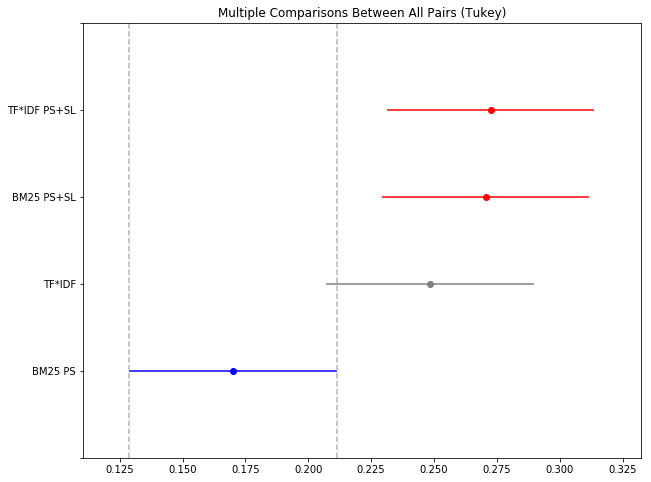

In [18]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
# ordino modelli per una migliore visualizzazione del test di Tukey
rPrec_list = np.array([['BM25 PS+SL',Rprec[0]],
                    ['TF*IDF PS+SL',Rprec[1]],
                    ['BM25 PS',Rprec[2]],
                    ['TF*IDF',Rprec[3]]])
# array con nomi dei modelli
strs1 = ['BM25 PS+SL']*50
strs2 = ['TF*IDF PS+SL']*50
strs3 = ['BM25 PS']*50
strs4 = ['TF*IDF']*50

sorted_rPrec_list = rPrec_list[rPrec_list[:,1].argsort()]
# valori di Rprecision
scores = np.concatenate((rPrec_values1,rPrec_values2,rPrec_values3,rPrec_values4))
models = np.array(strs1+strs2+strs3+strs4)
mc = MultiComparison(scores,models,group_order=sorted_rPrec_list[:,0])
# test Tukey HSD
result = mc.tukeyhsd()
# plot del test di Tukey
result.plot_simultaneous(comparison_name="BM25 PS",figsize=(10,8))
# stampa tabella con i confronti tra i modelli considerati e la verifica che la null hypothesis sia stata rifiutata o no
print(result)

Dal test si può notare che nella seconda e terza riga della tabella, cioè nel confronto tra i modelli <b>"BM25 Stemmer - BM25 Stemmer+Stoplist"</b> e <b>"BM25 Stemmer - TF * IDF Stemmer+Stoplist"</b> l'ipotesi H<sub>0</sub> viene rifiutata, infatti il loro intervallo di confidenza non contiene l'origine, e ciò significa che i modelli sono statisticamente diversi. Questo risultato è evidenziato dal plot. <br>
Anche per quanto riguarda questa analisi (test statistico sui valori di Rprec) i sistemi appartenenti al top group risultano i primi due <b>"BM25 Stoplist+PorterStemmer</b> e <b>"TF*IDF Stoplist+PorterStemmer"</b>, diversi dal peggiore <b>"BM25 PorterStemmer"</b>.

<h2>Precision at 10</h2>

In [19]:
#Reperimento valori di Precision at 10 per il test statistico ANOVA 1-way
prec10_values1 = np.zeros(51)
prec10_values2 = np.zeros(51)
prec10_values3 = np.zeros(51)
prec10_values4 = np.zeros(51)
j=0
for i in range(eval_run1.shape[0]):
    if(eval_run1[i][0]== "P_10"):
        #estrazione valori di P10 per i 50 topic
        prec10_values1[j]=float(eval_run1[i][2])
        prec10_values2[j]=float(eval_run2[i][2])
        prec10_values3[j]=float(eval_run3[i][2])
        prec10_values4[j]=float(eval_run4[i][2])
        j = j+1
#50 valori, uno per topic, di P10 per ogni run
prec10_values1 = prec10_values1[:50]
prec10_values2 = prec10_values2[:50]
prec10_values3 = prec10_values3[:50]
prec10_values4 = prec10_values4[:50]

<h3>BoxPlot delle run</h3>

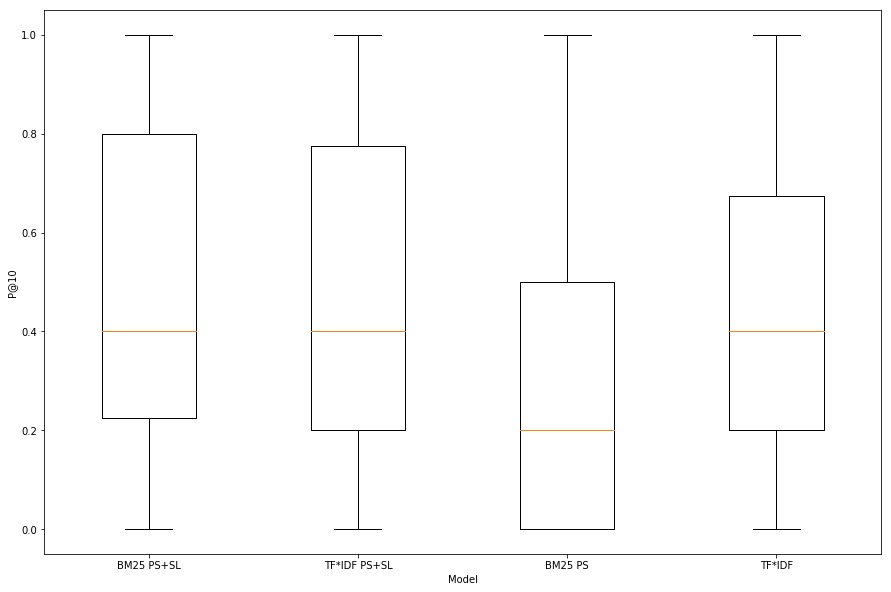

In [20]:
plt.figure(figsize=[15,10])
plt.boxplot([prec10_values1,prec10_values2,prec10_values3,prec10_values4], labels=['BM25 PS+SL','TF*IDF PS+SL','BM25 PS','TF*IDF'])
plt.ylabel("P@10")
plt.xlabel("Model")
plt.show()

Dove:
- PS = Porter Stemmer
- SL = Stoplist

Il boxplot mostra che in tutti i modelli c'è almeno un valore massimo di P10, cioè i primi dieci documenti recuperati sono tutti rilevanti per il topic, in media però il valore si abbassa notevolmente. In particolare per il terzo modello, il quale assume molti valori di P10 pari a 0 ed il 50% dei valori sono minori di 0.5.  I modelli migliori restano, ancora un volta, i primi due.

<h3>ANOVA 1-way</h3>

In [21]:
import scipy.stats as stats
# funzione f_oneway() della libreria scipy.stats per eseguire il test ANOVA 1-way
stats,p = stats.f_oneway(prec10_values1,prec10_values2,prec10_values3,prec10_values4)

print("Test Anova 1-way:")
print("Valore di F:      ",stats)
print("Valore di PR(>F): ",p)

Test Anova 1-way:
Valore di F:       3.8806068502793134
Valore di PR(>F):  0.010032554063785504


Anche in questo caso la null hypothesis viene rigettata in quanto PR(>F)< $\alpha$ (0.01<0.05); come ci si aspettava, anche in questo caso la null hypothesis viene rigettata dati i risultati negativi ottenuti dalla terza run.

<h3>Tukey's Test</h3>

   Multiple Comparison of Means - Tukey HSD,FWER=0.05   
   group1       group2    meandiff  lower  upper  reject
--------------------------------------------------------
  BM25 PS       TF*IDF     0.124   -0.0322 0.2802 False 
  BM25 PS    TF*IDF PS+SL  0.176    0.0198 0.3322  True 
  BM25 PS     BM25 PS+SL    0.18    0.0238 0.3362  True 
   TF*IDF    TF*IDF PS+SL  0.052   -0.1042 0.2082 False 
   TF*IDF     BM25 PS+SL   0.056   -0.1002 0.2122 False 
TF*IDF PS+SL  BM25 PS+SL   0.004   -0.1522 0.1602 False 
--------------------------------------------------------


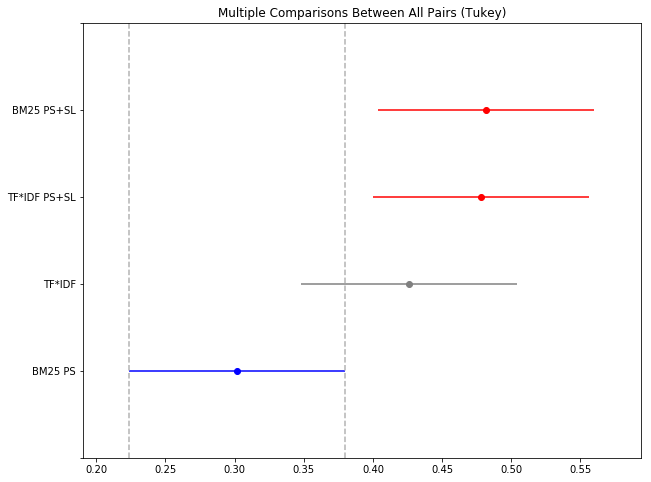

In [22]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
# ordino modelli per una migliore visualizzazione del test di Tukey
p10_list = np.array([['BM25 PS+SL',Precision[0]],
                    ['TF*IDF PS+SL',Precision[1]],
                    ['BM25 PS',Precision[2]],
                    ['TF*IDF',Precision[3]]])
# array con nomi dei modelli
strs1 = ['BM25 PS+SL']*50
strs2 = ['TF*IDF PS+SL']*50
strs3 = ['BM25 PS']*50
strs4 = ['TF*IDF']*50

sorted_p10_list = p10_list[p10_list[:,1].argsort()]
# valori di Precision at 10
scores = np.concatenate((prec10_values1,prec10_values2,prec10_values3,prec10_values4))
models = np.array(strs1+strs2+strs3+strs4)
mc = MultiComparison(scores,models,group_order=sorted_p10_list[:,0])
# test Tukey HSD
result = mc.tukeyhsd()
# plot del test di Tukey
result.plot_simultaneous(comparison_name="BM25 PS",figsize=(10,8))
# stampa tabella con i confronti tra i modelli considerati e la verifica che la null hypothesis sia stata rifiutata o no
print(result)

Dal test si può notare che nella seconda e terza riga della tabella, cioè nel confronto tra i modelli <b>"BM25 Stemmer - TF * IDF Stemmer+Stoplist"</b> e <b>"BM25 Stemmer - BM25 Stemmer+Stoplist"</b> l'ipotesi H<sub>0</sub> viene rifiutata, infatti il loro intervallo di confidenza non contiene l'origine, e ciò significa che i modelli sono statisticamente diversi. Questo risultato è evidenziato dal plot. <br>
In definitiva, possiamo concludere che i modelli appartenenti al <i>top group</i> sono quelli delle prime due run, cioè <b>BM 25 PorterStemmer+Stoplist</b> e <b> TF * IDF PorterStemmer+Stoplist</b>; essi sono significativamente diversi dal terzo modello <b> BM25 PorterStemmer</b>, mentre per quanto riguarda il quarto modello <b>TF * IDF no Stemmer no Stoplist</b>, esso  si colloca nel mezzo e che quindi non è significativamente differente dagli altri.